#Neural network can be build and trained simply by the following methods

## data preprocessing

            --> import the data
            --> split the data
            --> standardization/normalization
            --> analyse the shape

## build the network

           --> choose the layer and the activation according to the project
           --> models.Sequential([])
           --> the initial network acts as input network should contain the input_shape() function

## compile

          --> choose the optimiser
          --> choose the loss function
          --> choose the metrics


## fit

         --> Fit the training data into the model
         --> x_train and y_train

## elvaluate

         --> evaluate the model using test data
         --> apply a confusion matrix
         --> plt using model.history for loss or stuff

         


#CONVOLUTIONAL NEURAL NETWORK


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,datasets,layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data=datasets.cifar10

def image(x,y,num):
    plt.imshow(x[num],label=y[num])

(x_train,y_train),(x_test,y_test)=data.load_data()

x_train.shape

x_train=x_train/255
x_test=x_test/255

y_train=y_train.reshape(-1,)



model =  models.Sequential(
    [


    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(32,activation="relu"),
    layers.Dense(10,activation="softmax"),
]
)


model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train,epochs=10)


model.evaluate(x_test,y_test)

model.save("hello_world")


170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.6318 - accuracy: 0.4038
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2905 - accuracy: 0.5405
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1538 - accuracy: 0.5890
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0776 - accuracy: 0.6180
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0221 - accuracy: 0.6390
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9843 - accuracy: 0.6513
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9421 - accuracy: 0.6684
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9113 - accuracy: 0.6796
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8813 - accuracy: 0.6905
Epoch 10/10
31

##Linear regression

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-03-03 05:58:06--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-03-03 05:58:06 (35.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,datasets,layers,optimizers,callbacks

data=pd.read_csv("moore.csv",header=0).to_numpy()

X=data[:,0].reshape(-1,1)
Y=data[:,1]

Y=np.log(Y)

X =  X - X.mean()

model =  models.Sequential(
    [
        layers.Dense(1,input_shape=(1,)),
        layers.Dense(1),

    ]
)


model.compile(optimizer=optimizers.SGD(0.0001,0.9),loss="mse")

def scheduler(lr,epochs):
  if epochs >= 50 :
    return 0.0001
  else:
    return 0.001


scheduler = callbacks.LearningRateScheduler(scheduler)

r = model.fit(X,Y,epochs=200,callbacks=scheduler,validation_data=(X,Y))


plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="loss")
plt.legend



#Recurrent Neural Network



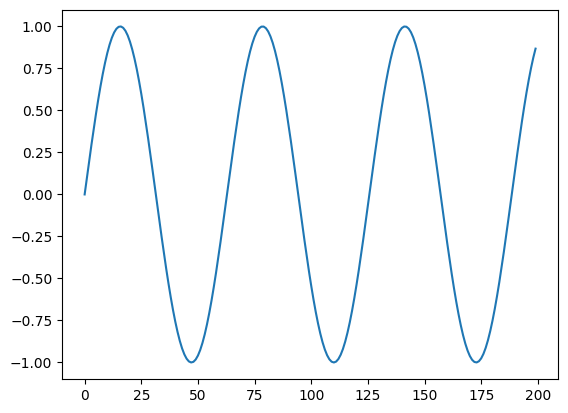

190


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

fx=np.sin(0.1*np.arange(200))
plt.plot(fx)
plt.show()


t=10
x=[]
y=[]
for T in range(len(fx)-t):
  X=fx[T:t+T]
  x.append(X)
  Y=fx[t+T]
  y.append(Y)

x = np.array(x).reshape(-1, t,1)

y=np.array(y)

N=int(len(x))
print(N)


In [ ]:
from tensorflow.keras.layers import Input,SimpleRNN,Dense,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

i=Input(shape=(t,1))
X=LSTM(5,activation="relu")(i)
x=Dense(1)(X)

model = Model(inputs=i, outputs=x)


model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

In [ ]:
'''r=model.fit(
    x[:-N//2],y[:-N//2],epochs=100,validation_data=(x[-N//2:],y[-N//2:])
)'''

'r=model.fit(\n    x[:-N//2],y[:-N//2],epochs=100,validation_data=(x[-N//2:],y[-N//2:])\n)'

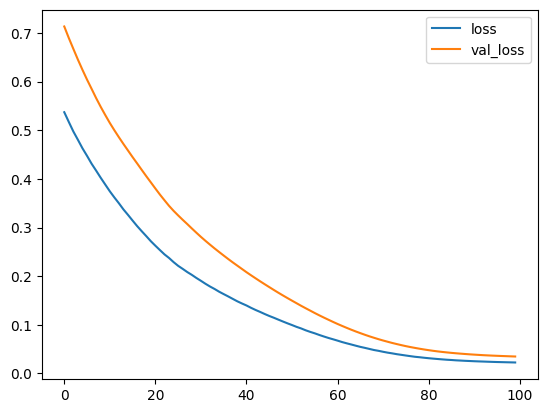

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Input,GRU,SimpleRNN,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=mnist.load_data()

def imagess(x,y,num):
  plt.imshow(x[num],label=y[num])




x_train=x_train/255
x_test=x_test/255

num_classes = len(set(y_train))
print("Number of classes:", 2)


i=Input(shape=(28,28),)
X=LSTM(5,activation="tanh")(i)
x=Dense(10,activation="softmax")(X)

model = Model(i,x)

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

r=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))




Number of classes: 2
Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 1.5897 - accuracy: 0.4598 - val_loss: 1.2591 - val_accuracy: 0.5614
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1554 - accuracy: 0.5966 - val_loss: 1.0880 - val_accuracy: 0.6211
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 1.0398 - accuracy: 0.6357 - val_loss: 1.0019 - val_accuracy: 0.6537
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9732 - accuracy: 0.6615 - val_loss: 0.9351 - val_accuracy: 0.6740
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9226 - accuracy: 0.6829 - val_loss: 0.8892 - val_accuracy: 0.6973


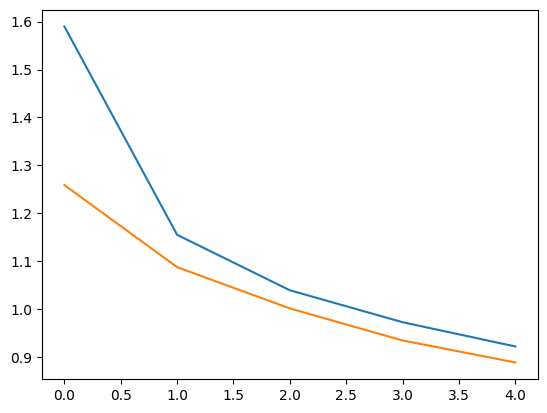

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")